# Problem 2 (Auto Associative)

## Import libraries

In [94]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

## Auto Associative Network

In [95]:
class AutoAssociativeNet:

  def __init__(self, patterns):
    self.memory = patterns
    self.nodes_count = len(self.memory[0].flatten())
    self.weights = np.zeros((self.nodes_count, self.nodes_count))
    self.weight_matrix_initialization()
    self.treshold = 0

  def weight_matrix_initialization(self): 
    for pattern in self.memory:
      flatten_pattern = pattern.reshape((1, self.nodes_count))
      self.weights += np.dot(np.transpose(flatten_pattern), flatten_pattern)

    for i in range(self.nodes_count):
      self.weights[i][i] = 0

  def predict(self, pattern, verbose=True):
    flatten_pattern = pattern.reshape((1, self.nodes_count))
    result = np.dot(flatten_pattern, self.weights)
    result[result > self.treshold] = 1
    result[result < self.treshold] = -1

    for memorise_pattern in self.memory:
      if (memorise_pattern.flatten() == result).all():
        if verbose:
          print('I remember =))')
        return memorise_pattern, True
    if verbose:
      print('I cant remember :((')
    return result, False

## Add noise funciton

In [96]:
def add_noise(pattern, noise_percentage=0.3):
  noisy_pattern = np.copy(pattern)
  pattern_cells = len(pattern)
  mistaken_cells_count = math.floor(noise_percentage * pattern_cells)
  to_change_indices = random.sample(range(pattern_cells), mistaken_cells_count)
  for index in to_change_indices:
    noisy_pattern[index] *= -1
  return noisy_pattern

## Run function for different parameters

In [97]:
def run(features_count, vector_count, error_rate):
  accuracies = []
  for _ in range(30):
    main_vectors = []
    noisy_vectors = []
    for _ in range(vector_count):
      random_vector = np.random.rand(features_count)*2 -1
      random_vector[random_vector >= 0] = 1
      random_vector[random_vector < 0] = -1
      main_vectors.append(random_vector)
      noisy_vector = add_noise(random_vector, error_rate)
      noisy_vectors.append(noisy_vector)
    
    main_vectors = np.array(main_vectors)
    noisy_vectors = np.array(noisy_vectors)
    aa_net = AutoAssociativeNet(main_vectors)
    vector_accuracy = []
    for index in range(main_vectors.shape[0]):
      main_vector = main_vectors[index]
      noisy_vector = noisy_vectors[index]
      result, found = aa_net.predict(noisy_vector, False)
      correct_values = np.count_nonzero(main_vector == result)
      vector_accuracy.append(correct_values/main_vector.shape[0])
    accuracies.append(np.mean(vector_accuracy))
  accuracy_mean = np.mean(accuracies)
  accuracy_sd = np.std(accuracies)
  print("N: {} - R: {} - E: {}".format(features_count, vector_count, error_rate))
  print("Accuracy mean: {}, std: {}".format(accuracy_mean, accuracy_sd))
  return accuracy_mean, accuracy_sd

## Test network

In [98]:
FEATURES_COUNT = 100
VECTOR_COUNTS = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
ERROR_RATES = [0, 0.2, 0.4]

error_rate_accuracies = dict()
for error_rate in ERROR_RATES:
  accuracy_means = []
  for vector_count in VECTOR_COUNTS:
    mean, _ = run(FEATURES_COUNT, vector_count, error_rate)
    accuracy_means.append(mean)
  error_rate_accuracies[error_rate] = accuracy_means
print(error_rate_accuracies)

N: 100 - R: 10 - E: 0
Accuracy mean: 0.9997333333333334, std: 0.0006289320754704408
N: 100 - R: 20 - E: 0
Accuracy mean: 0.9885333333333332, std: 0.00446641790352055
N: 100 - R: 30 - E: 0
Accuracy mean: 0.9654555555555555, std: 0.004109143673369775
N: 100 - R: 40 - E: 0
Accuracy mean: 0.9417416666666666, std: 0.005969883909163446
N: 100 - R: 50 - E: 0
Accuracy mean: 0.9194733333333333, std: 0.005540754060193935
N: 100 - R: 60 - E: 0
Accuracy mean: 0.89985, std: 0.0031996382897423307
N: 100 - R: 70 - E: 0
Accuracy mean: 0.8817571428571429, std: 0.003447201369069025
N: 100 - R: 80 - E: 0
Accuracy mean: 0.8663791666666667, std: 0.00475673681623117
N: 100 - R: 90 - E: 0
Accuracy mean: 0.850774074074074, std: 0.004805902007064783
N: 100 - R: 100 - E: 0
Accuracy mean: 0.8395433333333333, std: 0.003982602443405823
N: 100 - R: 10 - E: 0.2
Accuracy mean: 0.9758666666666668, std: 0.009120428839820111
N: 100 - R: 20 - E: 0.2
Accuracy mean: 0.9146500000000001, std: 0.009690330231731036
N: 100 - R:

## Plot accuracy means for different noise rates

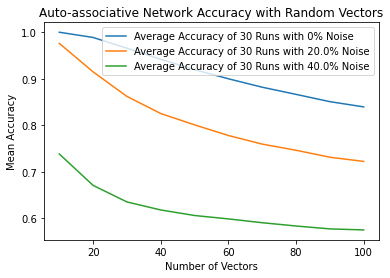

In [99]:
plt.title("Auto-associative Network Accuracy with Random Vectors")
plt.xlabel("Number of Vectors")
plt.ylabel("Mean Accuracy")
for error_rate, values in error_rate_accuracies.items():
  plt.plot(VECTOR_COUNTS, values, label="Average Accuracy of 30 Runs with {}% Noise".format(error_rate*100))
plt.legend()
plt.show()